<a href="https://colab.research.google.com/github/Tookss55/DS/blob/main/Unit2/AmirRegaU2Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install preliz

In [2]:
import preliz as pz
import numpy as np
import arviz as az
import pymc as pm
import arviz as az

## Context


For my Unit Project, I will be calculating the percent of citizens enrolled in Medicare, in Travis County, that are male verse female. Medicare is a health insurance organization that is funded and ran by the U.S. Department of Health and Human Services. After anonymizing their data they release a wide range of data sets on the internet.

## Prior

For my prior, I will assume that an about equal ratio of males and females are signed up for Medicare. I'm making this assupmtion because theres an equal chance a male or female is born when a child is birthed, as far as I know, so I'm setting both the alpha and beta values as 10, creating a 50% chance of any one beneficiaries is male/female.

<Axes: >

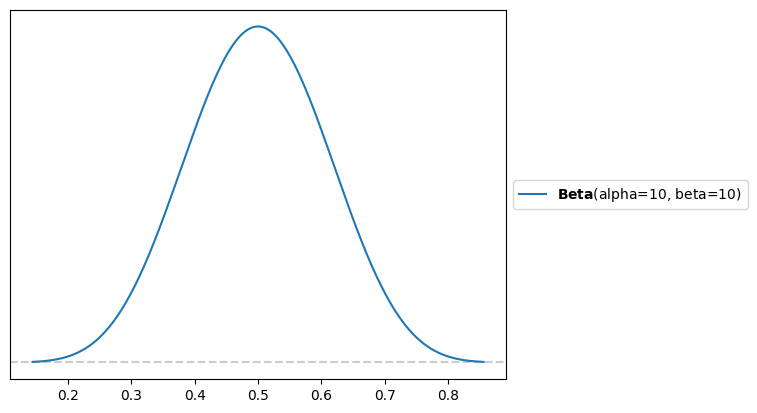

In [3]:
#credit: unit 2 notes
Prior = pz.Beta(alpha = 10, beta = 10)

Prior.plot_pdf()

## Likelihood

I've made my likelihood using a dataset from Centers for Medicare & Medicaid Services, who publish lots of datasets using information from Medicare records.I found a dataset that includes the total beneficiaries, as well as there gender. In January 2025, 155,121 Travis County citizens were Medicare beneficiaries, and of those, 71,632 are male, and 83,489 are female. I will focus my binomial distrutbution for my likelihood on the male beneficiaries,

$p(y|θ)=Binomial(n = 155121, k = 71632,θ)$

<Axes: >

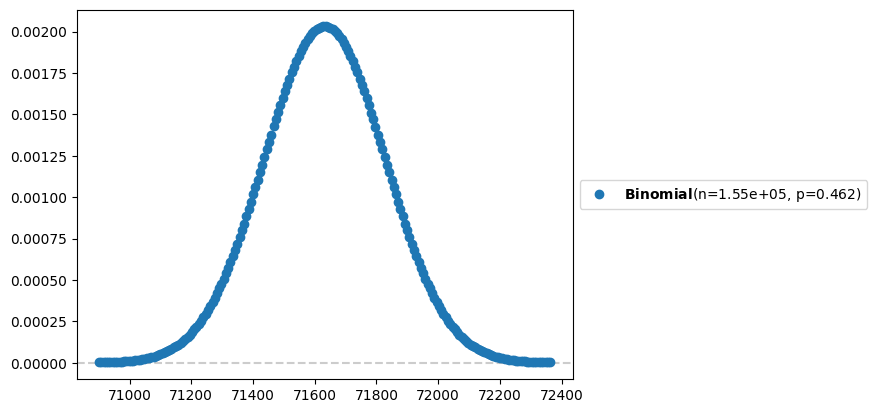

In [4]:
#credit: Unit 2 notes
pz.Binomial(n = 155121, p = 71632/155121).plot_pdf()

## Posterior

The likelihood graph above uses data from the Medicare Monthly Enrollment data set, meaning the probability that a 71,632 out of 155,121, or about 46%. Using this data, along with my prior, I'll make a posterior with a pymc model:

In [ ]:
Female = np.repeat(1, 83489)

Male = np.repeat(0,  71632)

M_F_data = np.concatenate( [Female,Male] )

with pm.Model() as M_F_data_model:

  θ = pm.Beta('θ' , alpha = 10. , beta = 10.)

  y = pm.Bernoulli('y', p = θ, observed = M_F_data)

  idata_M_F = pm.sample()


<Axes: title={'center': 'θ'}>

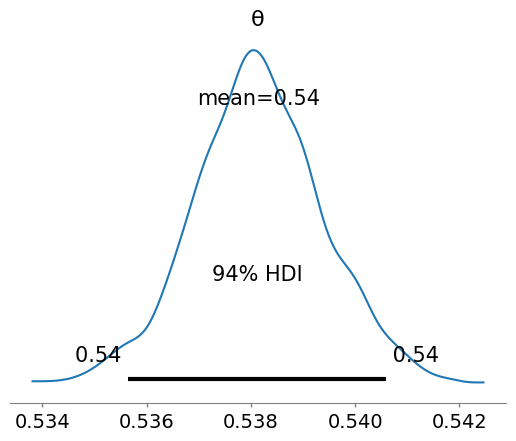

In [6]:
az.plot_posterior(idata_M_F)

## Final Conclusion


This pymc model shows:


*   the mean, the expected percentage of a female
*   the HDI, the true probability of a beneficiary being a female is between the left and right values, approximately 53.6% and 54.0%.

This is not what I predicted in my prior. I expected a almost perfect 50% split between male and female. The curve in the graph i svery compressed, displaying a very small amount of uncertainty in the pymc model, due to my very high amount of data.

